# Linear regression

Import all the modules you will need in this notebook here:

In [14]:
# exercise 0
# Put your solution here!

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
from matplotlib.pyplot import subplots

We continue analysing the `fram` heart disease data.

First load the data, use the name `fram` for the DataFrame variable. Make sure that in the data you loaded the column and row headers are in place. Checkout the summary of the variables using the `describe` method.

In [15]:
# exercise 1
def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":   # Running under TMC
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename
    
# Put your solution here!

fram = pd.read_csv(get_path('fram.txt'), sep='\t')
fram.describe() 


ID          AGE          FRW          SBP       SBP10  \
count  1394.000000  1394.000000  1394.000000  1394.000000  767.000000   
mean   4737.184362    52.431133   105.365136   148.086083  148.040417   
std    1073.406896     4.781507    17.752489    28.022062   25.706664   
min    1070.000000    45.000000    52.000000    90.000000   94.000000   
25%    3890.250000    48.000000    94.000000   130.000000  130.000000   
50%    4821.000000    52.000000   103.000000   142.000000  145.000000   
75%    5641.750000    56.000000   114.000000   160.000000  160.000000   
max    6442.000000    62.000000   222.000000   300.000000  264.000000   

               DBP         CHOL          CIG          CHD        DEATH  \
count  1394.000000  1394.000000  1394.000000  1394.000000  1394.000000   
mean     90.135581   234.644907     8.029412     1.187948     1.700861   
std      14.226235    46.303822    11.584138     2.615976     3.203132   
min      50.000000    96.000000     0.000000     0.000000     0.000000   
25%      80.000000   200.000000     0.000000     0.000000     0.000000   
50%      90.000000   230.000000     0.000000     0.000000     0.000000   
75%      98.000000   264.000000    20.000000     0.000000     0.000000   
max     160.000000   430.000000    60.000000    10.000000    10.000000   

           YRS_DTH  
count  1394.000000  
mean     16.219512  
std       3.921413  
min       1.000000  
25%      18.000000  
50%      18.000000  
75%      18.000000  
max      18.000000

Create function `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [16]:
# exercise 2
# Put your solution here!

def rescale(serie):
    std = 2 * serie.std()
    mean = serie.mean()
    return serie.apply(lambda x: (x-mean)/std)


Add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [17]:
# exercise 3
# Put your solution here!

columns = ["AGE", "FRW", "SBP", "SBP10", "DBP", "CHOL", "CIG", "CHD", "DEATH", "YRS_DTH"]

for col in columns:
    fram["s" + col] = rescale(fram[col])

fram.describe()

ID          AGE          FRW          SBP       SBP10  \
count  1394.000000  1394.000000  1394.000000  1394.000000  767.000000   
mean   4737.184362    52.431133   105.365136   148.086083  148.040417   
std    1073.406896     4.781507    17.752489    28.022062   25.706664   
min    1070.000000    45.000000    52.000000    90.000000   94.000000   
25%    3890.250000    48.000000    94.000000   130.000000  130.000000   
50%    4821.000000    52.000000   103.000000   142.000000  145.000000   
75%    5641.750000    56.000000   114.000000   160.000000  160.000000   
max    6442.000000    62.000000   222.000000   300.000000  264.000000   

               DBP         CHOL          CIG          CHD        DEATH  ...  \
count  1394.000000  1394.000000  1394.000000  1394.000000  1394.000000  ...   
mean     90.135581   234.644907     8.029412     1.187948     1.700861  ...   
std      14.226235    46.303822    11.584138     2.615976     3.203132  ...   
min      50.000000    96.000000     0.000000     0.000000     0.000000  ...   
25%      80.000000   200.000000     0.000000     0.000000     0.000000  ...   
50%      90.000000   230.000000     0.000000     0.000000     0.000000  ...   
75%      98.000000   264.000000    20.000000     0.000000     0.000000  ...   
max     160.000000   430.000000    60.000000    10.000000    10.000000  ...   

               sAGE          sFRW          sSBP        sSBP10          sDBP  \
count  1.394000e+03  1.394000e+03  1.394000e+03  7.670000e+02  1.394000e+03   
mean   1.288623e-16 -1.162787e-17 -8.123583e-17  1.353401e-17  1.358435e-16   
std    5.000000e-01  5.000000e-01  5.000000e-01  5.000000e-01  5.000000e-01   
min   -7.770703e-01 -1.503033e+00 -1.036435e+00 -1.051097e+00 -1.410618e+00   
25%   -4.633616e-01 -3.200998e-01 -3.227115e-01 -3.508899e-01 -3.562285e-01   
50%   -4.508343e-02 -6.661422e-02 -1.085945e-01 -5.913675e-02 -4.765177e-03   
75%    3.731948e-01  2.432015e-01  2.125810e-01  2.326164e-01  2.764055e-01   
max    1.000612e+00  3.285029e+00  2.710613e+00  2.255438e+00  2.455478e+00   

              sCHOL          sCIG          sCHD        sDEATH      sYRS_DTH  
count  1.394000e+03  1.394000e+03  1.394000e+03  1.394000e+03  1.394000e+03  
mean  -3.038379e-17 -2.352733e-15 -1.355882e-15  1.074065e-15  1.044597e-15  
std    5.000000e-01  5.000000e-01  5.000000e-01  5.000000e-01  5.000000e-01  
min   -1.497122e+00 -3.465693e-01 -2.270565e-01 -2.654996e-01 -1.940565e+00  
25%   -3.741042e-01 -3.465693e-01 -2.270565e-01 -2.654996e-01  2.270212e-01  
50%   -5.015684e-02 -3.465693e-01 -2.270565e-01 -2.654996e-01  2.270212e-01  
75%    3.169835e-01  5.166802e-01 -2.270565e-01 -2.654996e-01  2.270212e-01  
max    2.109492e+00  2.243179e+00  1.684276e+00  1.295472e+00  2.270212e-01  

[8 rows x 21 columns]

Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           4.13e-40
Time:                        20:04:56   Log-Likelihood:                -6530.4
No. Observations:                1394   AIC:                         1.307e+04
Df Residuals:                    1390   BIC:                         1.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.0199      0.985    152.336      

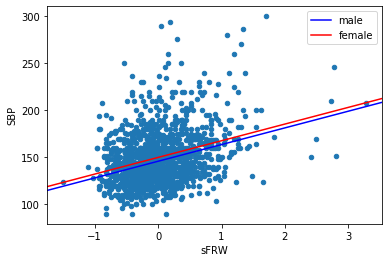

In [18]:
# exercise 4
# Put your solution here!

fit = smf.ols('SBP ~ sFRW + SEX + sCHOL', data=fram).fit()

print(fit.summary())

# Plot the results
p = fit.params

int1 = p.Intercept + p["SEX[T.male]"]
int2 = p.Intercept
slope = p.sFRW

fram.plot.scatter("sFRW","SBP")

abline_plot(intercept=int1, slope=slope, ax=plt.gca(), color="blue", label="male")
abline_plot(intercept=int2, slope=slope, ax=plt.gca(), color="red", label="female")

plt.legend();

Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           2.44e-46
Time:                        20:04:57   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      

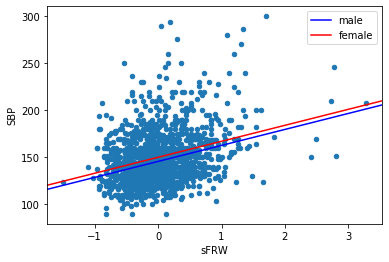

In [19]:
# exercise 5
# Put your solution here!

fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE', data=fram).fit()

print(fit.summary())

# Plot the results
p = fit.params

int1 = p.Intercept + p["SEX[T.male]"]
int2 = p.Intercept
slope = p.sFRW

fram.plot.scatter("sFRW","SBP")

abline_plot(intercept=int1, slope=slope, ax=plt.gca(), color="blue", label="male")
abline_plot(intercept=int2, slope=slope, ax=plt.gca(), color="red", label="female")

plt.legend();


How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***
My Solution:

Looking at the charts of both the models, it seems that there is no significant difference between the two models.
However, the model that includes the variable sAge has:

- higher `Adj. R-squared` (0.144 > 0.125) 
- lower `Prob (F-statistic)` (2.44e-46 < 4.13e-40) 

The `Adj. R-squared` increases only when the new explanatory variable improves the model fit more than expected by chance alone. Moreover with a lower `Prob (F-statistic)`, it means that the regression equation fits the data better.

In both of the models, the variable that explains the variance of the target variable most is `sFRW`

***

Try to add to the model all the interactions with other variables. 

In [20]:
# exercise 6
# Put your solution here!

fit=smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE + SEX:sFRW + sCHOL:sFRW + sAGE:sFRW + SEX:sCHOL + SEX:sAGE + sAGE:sCHOL', data=fram).fit()

print(fit.summary())


                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     24.52
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           4.92e-43
Time:                        20:04:57   Log-Likelihood:                -6509.9
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1383   BIC:                         1.310e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           150.5439      1.00

Then visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Remember to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

Intercept            150.543854
SEX[T.male]           -4.730869
sFRW                  16.644973
SEX[T.male]:sFRW       1.667323
sCHOL                  3.618124
SEX[T.male]:sCHOL      1.023083
sAGE                  10.218851
SEX[T.male]:sAGE      -4.292337
sCHOL:sFRW             4.972936
sAGE:sFRW             -2.086574
sAGE:sCHOL            -4.756423
dtype: float64


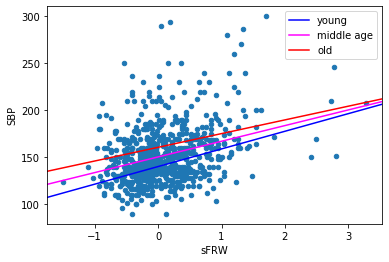

In [21]:
# exercise 7
# Put your solution here!

p = fit.params
print(p)

intc = p.Intercept

fram[fram.SEX=="female"].plot.scatter("sFRW","SBP")

abline_plot(intercept = intc - p["sAGE"], 
            slope = p.sFRW - p["sAGE:sFRW"],
            ax = plt.gca(), 
            color = "blue", 
            label = "young")

abline_plot(intercept = intc, 
            slope = p.sFRW,
            ax = plt.gca(), 
            color = "magenta", 
            label = "middle age")

abline_plot(intercept = intc + p["sAGE"], 
            slope = p.sFRW + p["sAGE:sFRW"],
            ax = plt.gca(), 
            color = "red", 
            label = "old")

plt.legend();

How does the dependence of blood pressure on weight change as a person gets older?
***
My solution:

Looking at the chart, we can see that:

- For high values of the weight, the `SBP` converges almost to the same values regardless of the age
- For values that are closer to the average, the age influences the `SBP`. The chart shows that younger people seem to have lower SBP in general. The differences between `SBP` of different ages become smaller when weight increases.

***

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     16.50
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           2.99e-40
Time:                        20:04:57   Log-Likelihood:                -6508.6
No. Observations:                1394   AIC:                         1.305e+04
Df Residuals:                    1378   BIC:                         1.313e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           151.3182      1.16

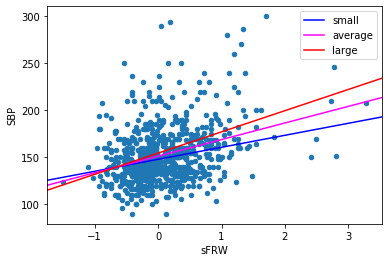

In [22]:
# exercise 8
# Put your solution here!

reg_eq = ("SBP ~ sFRW + SEX + sCHOL + sAGE + sCIG" +
                "+ SEX:sFRW + sCHOL:sFRW + sAGE:sFRW" +
                "+ SEX:sCHOL + SEX:sAGE + sAGE:sCHOL" +
                "+ sCIG:sFRW + sCIG:SEX + sCIG:sCHOL + sCIG:sAGE")

fit = smf.ols(reg_eq, data=fram).fit()

print(fit.summary())

#PLOT
p = fit.params
intc = p.Intercept

fram[fram.SEX=="female"].plot.scatter("sFRW","SBP")

abline_plot(intercept = intc - p["sCHOL"], 
            slope = p.sFRW - p["sCHOL:sFRW"],
            ax = plt.gca(), 
            color = "blue", 
            label = "small")

abline_plot(intercept = intc, 
            slope = p.sFRW,
            ax = plt.gca(), 
            color = "magenta", 
            label = "average")

abline_plot(intercept = intc + p["sCHOL"], 
            slope = p.sFRW + p["sCHOL:sFRW"],
            ax = plt.gca(), 
            color = "red", 
            label = "large")

plt.legend();


How does the model and its accuracy look?

***

My Solution:

Compared to the exercise 5, the model in the current exercise shows:

- lower `Adj. R-squared` (0.143 < 0.144) 
- higher `Prob (F-statistic)` (2.99e-40 > 2.44e-46) 

The decrease `Adj. R-squared` seems to show that the new explanatory variables and their interactions are not improving the model. Moreover, with a higher `Prob (F-statistic)`, the regression equation is not fitting the data better.

***

# Logistic regression

In [23]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

In [24]:
# exercise 9
# Put your solution here!

fram["HIGH_BP"] = (fram.SBP >= 140) | (fram.DBP >= 90)
fram.HIGH_BP = fram.HIGH_BP.map(int)

fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW", 
              data=fram, 
              family=sm.families.Binomial()
             ).fit()

print(fit.summary())

error_rate_orig = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | 
                          ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))

print("Error_rate_orig:", error_rate_orig)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                HIGH_BP   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1390
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -856.87
Date:                Tue, 28 Apr 2020   Deviance:                       1713.7
Time:                        20:04:58   Pearson chi2:                 1.39e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7631      0.082  

Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [25]:
# exercise 10
# Put your solution here!

fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + sAGE + SEX:sFRW + sFRW:sAGE + sAGE:SEX", 
              data=fram, 
              family=sm.families.Binomial()
             ).fit()

print(fit.summary())

error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | 
                     ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))

print("Error_rate:", error_rate)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                HIGH_BP   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1387
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -845.51
Date:                Tue, 28 Apr 2020   Deviance:                       1691.0
Time:                        20:04:58   Pearson chi2:                 1.39e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.8079      0.084  

Visualize the predicted probability of high blood pressure as the function of weight. Remember to use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

Intercept           0.807929
SEX[T.male]        -0.198273
sFRW                1.019648
SEX[T.male]:sFRW    0.375389
sAGE                0.600800
sAGE:SEX[T.male]   -0.572700
sFRW:sAGE          -0.758808
dtype: float64


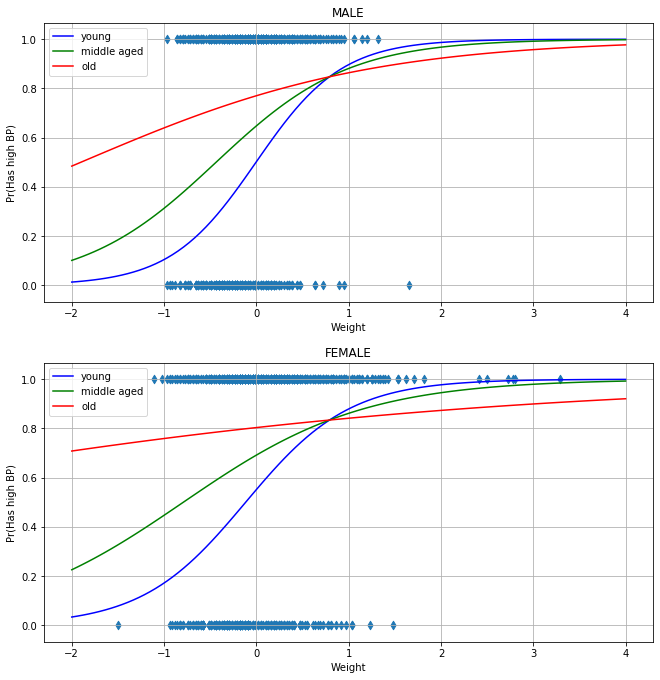

In [26]:
# exercise 11

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

# Put your solution here!

#To be fixed

p = fit.params
print(p)

int_male = p.Intercept + fit.params["SEX[T.male]"]
int_female = p.Intercept

slope_male = p.sFRW + p["SEX[T.male]:sFRW"]
slope_female = p.sFRW

X = np.linspace(-2, 4, 100)

fig, axes = subplots(2,1, figsize=(10,10))
fig.tight_layout(pad=4.0)

#Male plot
plt.subplot(2, 1, 1, title="MALE")

fram_male = fram[fram.SEX=="male"]
plt.scatter(fram_male.sFRW, fram_male.HIGH_BP, marker="d")

plt.plot(X, 
         logistic(X*(slope_male - p["sFRW:sAGE"]) + int_male - p["sAGE"]), 
         color="blue", 
         label="young")

plt.plot(X, 
         logistic(X*slope_male + int_male), 
         color="green", 
         label="middle aged")

plt.plot(X, 
         logistic(X*(slope_male + p["sFRW:sAGE"]) + int_male + p["sAGE"]), 
         color="red", 
         label="old")



plt.xlabel("Weight")
plt.ylabel("Pr(Has high BP)")
plt.grid()
plt.legend();

#Female plot
plt.subplot(2, 1, 2, title="FEMALE")

fram_female = fram[fram.SEX=="female"]

plt.scatter(fram_female.sFRW, fram_female.HIGH_BP, marker="d")

plt.plot(X, 
         logistic(X*(slope_female - p["sFRW:sAGE"]) + int_female - p["sAGE"]), 
         color="blue", 
         label="young")

plt.plot(X, 
         logistic(X*slope_female + p.Intercept), 
         color="green", 
         label="middle aged")

plt.plot(X, 
         logistic(X*(slope_female + p["sFRW:sAGE"]) + int_female + p["sAGE"]), 
         color="red", 
         label="old")

plt.xlabel("Weight")
plt.ylabel("Pr(Has high BP)")
plt.grid()
plt.legend()

How do the models with different ages and genders differ from each other?

***
My solution:

Looking at the chart, we can see that:

- For high values of the weight, the probability of high blood pressure converges to 1 regardless of the age and gender
- Elder is the person and higher is the probability to have high blood pressure
- The women seem to have a higher probability to have high blood pressure
- The weight seems to affect less the old women. Even if their weight is below the average, they show the highest probability of high blood pressure (men and women)
***

Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [27]:
# exercise 12
# Put your solution here!

def train_test_split(df, train_fraction=0.8):    
    train = df.sample(frac=train_fraction) 
    test = df.drop(train.index)
    return train, test


Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [28]:
# exercise 13
np.random.seed(1)
# Put your solution here!

error_model = []
error_null = []

for i in range(100):
    train, test = train_test_split(fram)

    fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + sAGE + SEX:sFRW + sFRW:sAGE + sAGE:SEX",
                  data=train,
                  family=sm.families.Binomial()
                  ).fit()

    pred = fit.predict(test)
    error_rate = np.mean(((pred < 0.5) & (test.HIGH_BP == 1)) | ((pred > 0.5) & (test.HIGH_BP == 0)))
    error_model.append(error_rate)
    error_null.append((1 - test.HIGH_BP).mean())

pd.Series(error_model).mean(), pd.Series(error_null).mean()

(0.3311827956989248, 0.3488530465949821)

## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [29]:
# exercise 14
# Put your solution here!

fram["hasCHD"] = fram.CHD > 0
fram["hasCHD"] = fram["hasCHD"].map(int)

fram["hasCHD"].mean()

0.22022955523672882

Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [30]:
# exercise 15
# Put your solution here!

fit = smf.glm(formula="hasCHD ~ sCHOL + sCIG + sFRW + sCHOL:sCIG + sCHOL:sFRW + sCIG:sFRW",
              data=fram,
              family=sm.families.Binomial()
              ).fit()

error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.hasCHD) | ((fit.fittedvalues > 0.5) & ~fram.hasCHD))

error_rate

0.22022955523672882

Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

No handles with labels found to put in legend.


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 hasCHD   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1387
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -721.19
Date:                Tue, 28 Apr 2020   Deviance:                       1442.4
Time:                        20:05:09   Pearson chi2:                 1.39e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2888      0.067    -19.101      0.0

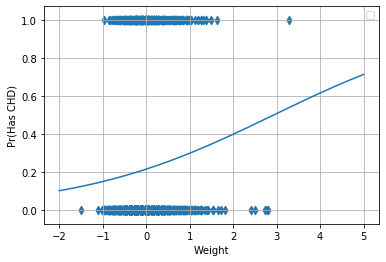

In [31]:
# exercise 16
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))
# Put your solution here!

print(fit.summary())

X = np.linspace(-2, 5, 100)

plt.scatter(fram.sFRW, fram.hasCHD, marker="d")

plt.plot(X, logistic((X*fit.params.sFRW) + fit.params.Intercept))

plt.xlabel("Weight")
plt.ylabel("Pr(Has CHD)")
plt.grid()
plt.legend()


Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?
***

My solution:

It seems that the model is not so good to predict if a person sometimes shows signs of coronal hearth disease.

For example, if a person has cholesterol 200, smokes 17 cigarettes per day, and has weight 100 the predicted probability is 0.216. In my opinion, it seems a quite low probability.
***

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

In [45]:
# exercise 17
# Put your solution here!

point = {}
for k,v in {"CHOL": 200, "CIG": 17, "FRW": 100}.items():
    mean = fram[k].mean()
    std = fram[k].std()
    point["s" + k] = (v-mean)/(2*std)
    
print(point)

predicted = fit.predict(point)[0]

predicted

# It was my first solution, for jupiter is totally fine 
# but tmc was throwing some error about that the normalize function was not defined

# def normalize(val, serie):
#     mean = serie.mean()
#     std = serie.std()
#     return (val-mean)/(2*std)


# point = {("s" + k): normalize(v, fram[k]) for (k,v) in {"CHOL": 200, "CIG": 17, "FRW": 100}.items()}
    
# print(point)

# predicted = fit.predict(point)[0]

# predicted

{'sCHOL': -0.37410417825308123, 'sCIG': 0.3871927538102121, 'sFRW': -0.15110941235605307}


0.2161616602504101